# Actividad 3.3

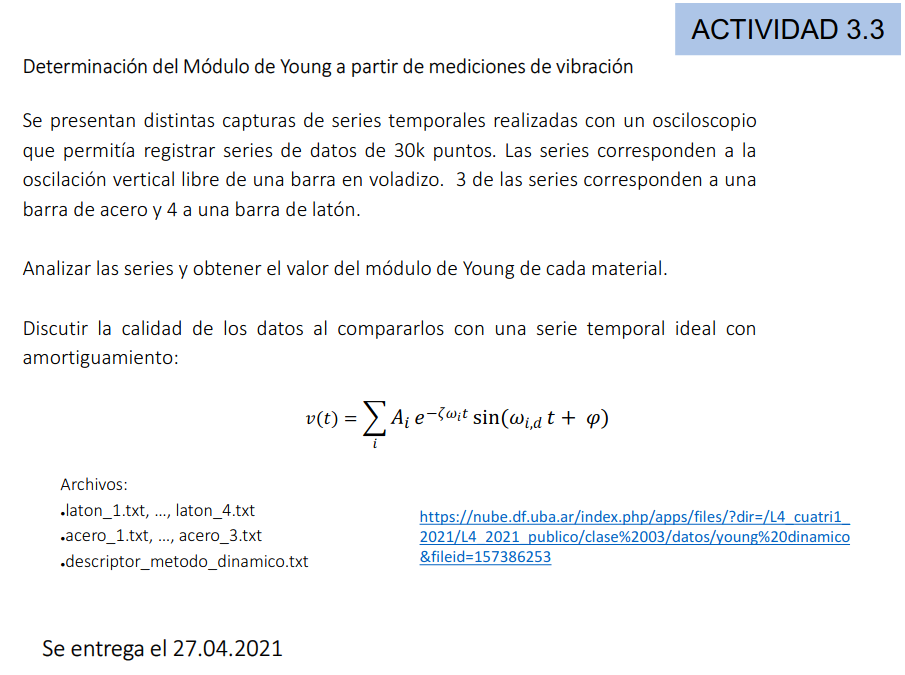

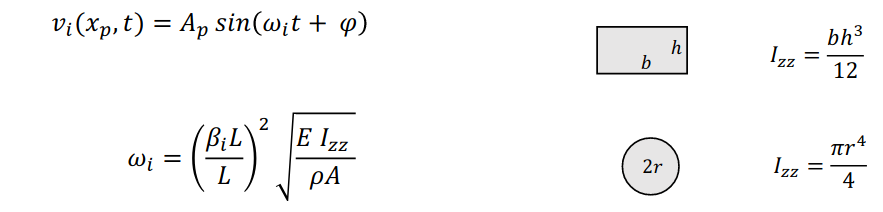

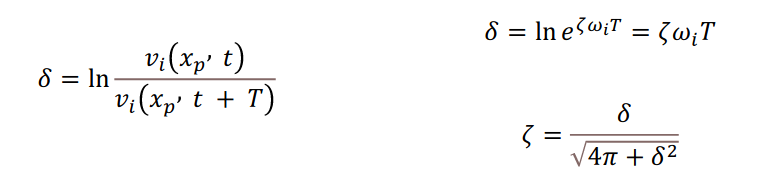

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
import matplotlib
import pint
from scipy import signal
%matplotlib inline

un = pint.UnitRegistry()
Q = un.Quantity

L_l = 255 * un.millimeter #mm logitud
L_a = 240 * un.millimeter#mm longitud

d_l = 4.6 * un.millimeter#mm diametro
d_a = 4.0 * un.millimeter#mm diametro

er_L = 2 * un.millimeter  #mm
er_d = 0.2 * un.millimeter#mm

r_a = 7850 * un.kilogram/(un.meter**3) #km/m^3 densidad
r_l = 8730 * un.kilogram/(un.meter**3)#km/m^3 densidad

E_l = 110e9 * un.pascal# pa
E_a = 200e9 * un.pascal# pa
#A = area transversal entiendo yo $pi*r^2$

bl = [1.875104, 4.694091, 7.854757, 10.99554]  #beta *L

archivos_laton = []
archivos_acero = []
for i in range(3):
    archivos_acero.append(np.loadtxt('data/acero_'+ str(i+1) +'.txt', skiprows = 4))
    archivos_laton.append(np.loadtxt('data/laton_'+ str(i+1) +'.txt', skiprows=  4))
archivos_laton.append(np.loadtxt('data/laton_4.txt', skiprows=  4))

In [2]:
Izz_l = np.pi*((d_l/2)**4)/4
Izz_a = np.pi*((d_a/2)**4)/4
B_l = np.pi*((d_l/2)**2)*r_l #El factor q va dividiendo en w
B_a = np.pi*((d_a/2)**2)*r_a #El factor q va dividiendo en w

#son las omwgas teoricas
w_l = []
w_a = [] 
for i in bl:#ver si bl es igual para ambos o no
    w_l.append((np.sqrt(E_l*Izz_l/B_l)*(i/L_l)**2).to(1/un.second)) 
    w_a.append((np.sqrt(E_a*Izz_a/B_a)*(i/L_a)**2).to(1/un.second))

In [3]:


#fft_l1 = np.fft.fft((archivos_laton[0][:,1])-np.mean(archivos_laton[0][:,1]))
#frec = np.linspace(min(archivos_laton[0][:,0]), max(archivos_laton[0][:,0]), len(archivos_laton[0][:,0]))
#plt.plot(frec, np.abs(fft_l1))
#plt.axvline(np.array(w_l[0]), linestyle = 'dashed', color = 'red')
#plt.axvline(np.array(w_l[1]), linestyle = 'dashed', color = 'red')
#plt.axvline(np.array(w_l[2]), linestyle = 'dashed', color = 'red')
#plt.axvline(np.array(w_l[3]), linestyle = 'dashed', color = 'red')
#plt.xlim([0,10])

<IPython.core.display.Javascript object>


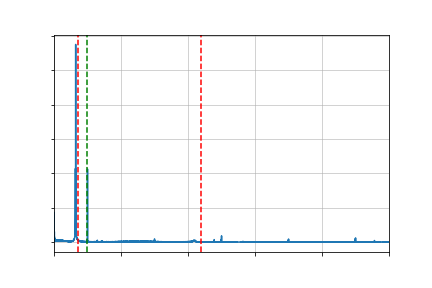

<ipython-input-4-6257f7c43eaa>:41: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  plt.axvline(np.array(w_l[0])/(2*np.pi), linestyle = 'dashed', color = 'red')
<ipython-input-4-6257f7c43eaa>:42: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  plt.axvline(np.array(w_l[1])/(2*np.pi), linestyle = 'dashed', color = 'red')
<ipython-input-4-6257f7c43eaa>:43: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  plt.axvline(np.array(w_l[2])/(2*np.pi), linestyle = 'dashed', color = 'red')
<ipython-input-4-6257f7c43eaa>:44: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  plt.axvline(np.array(w_l[3])/(2*np.pi), linestyle = 'dashed', color = 'red')


<IPython.core.display.Javascript object>


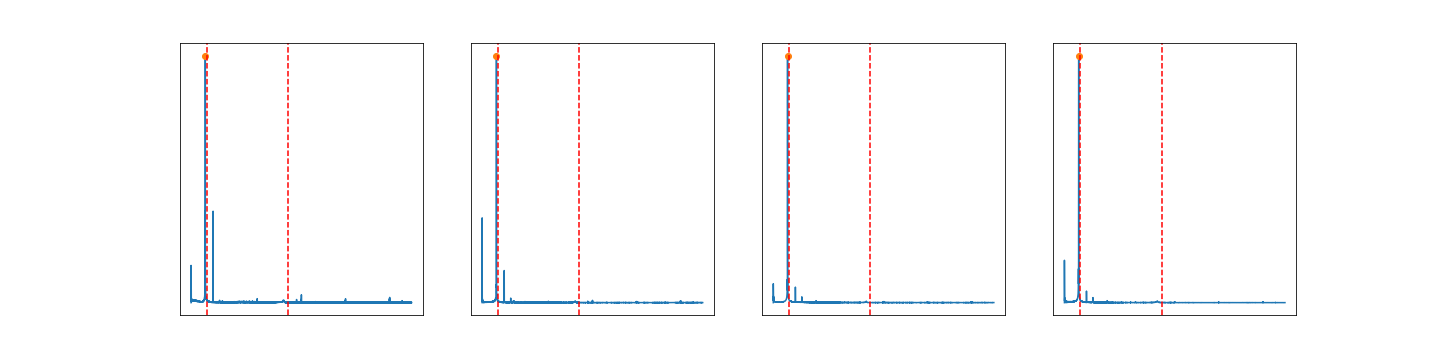

<ipython-input-4-6257f7c43eaa>:54: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  ax[i].axvline(np.array(w_l[0])/(2*np.pi), linestyle = 'dashed', color = 'red')
<ipython-input-4-6257f7c43eaa>:55: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  ax[i].axvline(np.array(w_l[1])/(2*np.pi), linestyle = 'dashed', color = 'red')
<ipython-input-4-6257f7c43eaa>:54: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  ax[i].axvline(np.array(w_l[0])/(2*np.pi), linestyle = 'dashed', color = 'red')
<ipython-input-4-6257f7c43eaa>:55: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  ax[i].axvline(np.array(w_l[1])/(2*np.pi), linestyle = 'dashed', color = 'red')
<ipython-input-4-6257f7c43eaa>:54: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  ax[i].axvline(np.array(w_l[0])/(2*np.pi), linestyle = 'dashed', 

In [4]:
%matplotlib nbagg
t = archivos_laton[0][:,0]
t_u = (Q, 'second')

laton = []
acero = []
for i in range(len(archivos_laton)):
    laton.append(archivos_laton[i][:,1])
    if i<3:
        acero.append(archivos_acero[i][:,1])
        
fft_l = []
fft_a = []
for i in range(len(laton)):
    fft_l.append(np.fft.fft(laton[i]-np.mean(laton[i])))
    if i<3:
        fft_a.append(np.fft.fft(acero[i]-np.mean(acero[i])))

fft_l2 = []
fft_a2 = []
picos_l = []
picos_a = []
for i in range(len(fft_l)):
    fft_l2.append(2/len(t) *np.abs(fft_l[i][:len(t)//2]))
    picos_l.append(signal.find_peaks(np.abs(fft_l2[i])))
    if i<3:
        fft_a2.append(2/len(t) *np.abs(fft_a[i][:len(t)//2]))
        picos_a.append(signal.find_peaks(np.abs(fft_a2[i])))
        
t_m = max(t)/len(t)
frec = np.linspace(0, 1/(t_m*2), int(len(t)/2))
frec_u = Q(frec, '1/second')

#plt.plot(t[1000:10000],laton[0][1000:10000])
plt.figure()
plt.plot(frec, np.abs(fft_l2[0]))
plt.xlim([0,500])
plt.grid(True, alpha=0.7)
plt.xticks(color= 'w')
plt.yticks(color='w')
plt.axvline(np.array(w_l[0])/(2*np.pi), linestyle = 'dashed', color = 'red')
plt.axvline(np.array(w_l[1])/(2*np.pi), linestyle = 'dashed', color = 'red')
plt.axvline(np.array(w_l[2])/(2*np.pi), linestyle = 'dashed', color = 'red')
plt.axvline(np.array(w_l[3])/(2*np.pi), linestyle = 'dashed', color = 'red')
plt.axvline(50,linestyle = 'dashed', color='green')

with plt.rc_context({'xtick.color':'w', 'ytick.color':'w'}):
    fig, ax = plt.subplots(1,4, figsize= (20,5))
    #ax[i].set_xticks(color= 'w')
    #ax[i].set_yticks(color='w')
    for i in range(len(fft_l2)):
        ax[i].plot(frec, np.abs(fft_l2[i]))
        ax[i].plot(frec[np.argmax(fft_l2[i])] , max(fft_l2[i]), 'o')
        ax[i].axvline(np.array(w_l[0])/(2*np.pi), linestyle = 'dashed', color = 'red')
        ax[i].axvline(np.array(w_l[1])/(2*np.pi), linestyle = 'dashed', color = 'red')
        plt.show()
        #ax[i].set_xlabel(color ='w')
        #ax[i].tick_params(color='w')
        #ax[i].set_xticks(color= 'w')
        #ax[i].set_yticks(color='w')


<IPython.core.display.Javascript object>


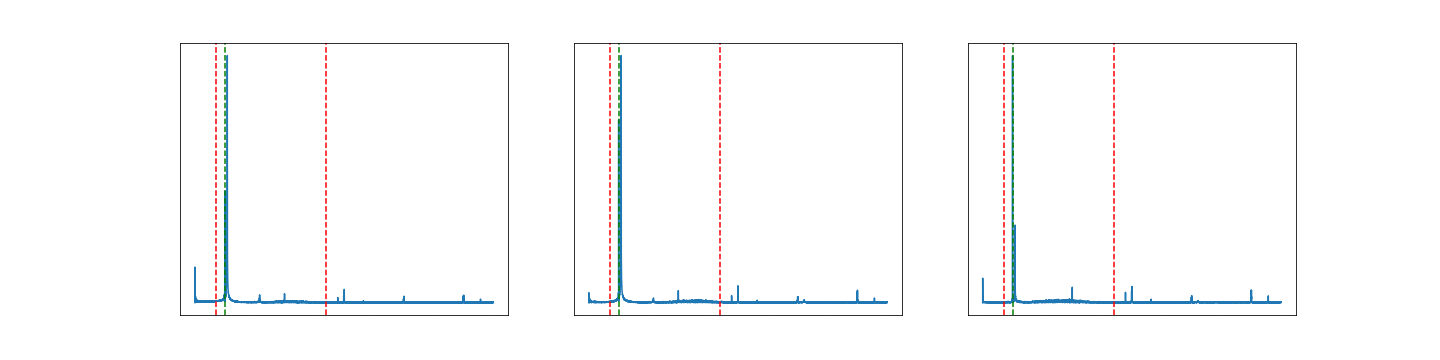

<ipython-input-5-c32019a4fce9>:5: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  ax[i].axvline(np.array(w_l[0])/(2*np.pi), linestyle = 'dashed', color = 'red')
<ipython-input-5-c32019a4fce9>:6: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  ax[i].axvline(np.array(w_l[1])/(2*np.pi), linestyle = 'dashed', color = 'red')
<ipython-input-5-c32019a4fce9>:5: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  ax[i].axvline(np.array(w_l[0])/(2*np.pi), linestyle = 'dashed', color = 'red')
<ipython-input-5-c32019a4fce9>:6: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  ax[i].axvline(np.array(w_l[1])/(2*np.pi), linestyle = 'dashed', color = 'red')
<ipython-input-5-c32019a4fce9>:5: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  ax[i].axvline(np.array(w_l[0])/(2*np.pi), linestyle = 'dashed', color

In [5]:
with plt.rc_context({'xtick.color':'w', 'ytick.color':'w'}):
    fig, ax = plt.subplots(1,3, figsize= (20,5))
    for i in range(len(fft_a2)):
        ax[i].plot(frec, np.abs(fft_a2[i]))
        ax[i].axvline(np.array(w_l[0])/(2*np.pi), linestyle = 'dashed', color = 'red')
        ax[i].axvline(np.array(w_l[1])/(2*np.pi), linestyle = 'dashed', color = 'red')
        ax[i].axvline(50,linestyle = 'dashed', color='green')


In [8]:
#sin el zeda
w_l_exp = []
w_a_exp = []#w_a_exp[2] modificar
for i in range(len(fft_l2)):
    a = np.argmax(fft_l2[i])
    w_l_exp.append(frec[a])
    if i<3:
        b = np.argmax(fft_a2[i])
        w_a_exp.append(frec[b])
        

E_exp_l = (B_l/Izz_l) * (((np.mean(w_l_exp)*2*np.pi*(1/un.second))*(L_l/bl[0])**2)**2)
#E_exp_a = (B_a/Izz_l) * (((np.mean(w_a_exp)*2*np.pi*(1/un.second))*(L_a/bl[0])**2)**2) #acero geral
E_exp_a = (B_a/Izz_l) * (((((w_a_exp[0]+w_a_exp[1])/2)*2*np.pi*(1/un.second))*(L_a/bl[0])**2)**2) #acero solo con los primeros dos w


#E_exp_l.to(un.pascal)/1e9
E_exp_a.to(un.pascal)/1e9


139.89462085700703 <Unit('pascal')>

In [9]:
from scipy.signal import find_peaks

t_2 = archivos_acero[0][:,0][0:10000]
a_2 = []
for i in range(3):
    a_2.append(archivos_acero[i][:,1][0:10000])

t_step = max(t_2)/len(t_2)
frec2 = np.linspace(0, 1/(t_step*2), int(len(t_2)/2))
#frec2 = np.linspace(1/(t_min_2*2), 1/(t_max_2*2), int(len(t_2)/2))
fft_a2_1 = []
fft_a2_2 = []
w_a_exp_2 = []
for i in range(3):
    fft_a2_1.append(np.fft.fft(a_2[i]-np.mean(a_2[i])))
    fft_a2_2.append(2/len(t_2) *np.abs(fft_a2_1[i][:len(t_2)//2]))
    a= np.argmax(fft_a2_2[i])
    w_a_exp_2.append(frec2[a])
    
w_a_exp_2
#ma = np.argmax(fft_a2_2)
#frec2[ma]
#plt.plot(frec2, np.abs(fft_a2_2[0]))
#plt.plot(frec2[ma], max(fft_a2_2[0]), 'ro')
#a, _ = find_peaks(a_2[0], height =2.2)
#cte = np.linspace(2.3, 2.4, len(a[0]))
#plt.plot(archivos_acero[0][:,0][0:10000],archivos_acero[0][:,1][0:10000])
#plt.plot(a, a_2[0][a],'.')
#plt.xlim([4,4.5])
E_exp = (B_a/Izz_l) * (((np.mean(w_a_exp_2)*2*np.pi*(1/un.second))*(L_a/bl[0])**2)**2)
E_exp.to(un.pascal)/1e9
#fft_a2_2[0][a[0]]
#max(np.abs(fft_a2_2[0]))

139.9505961192469 <Unit('pascal')>

## intento hacer el gráfico teórico primero con el laton

[<Quantity(308.111853, '1 / second')>, <Quantity(1930.90406, '1 / second')>, <Quantity(5406.58698, '1 / second')>, <Quantity(10594.7524, '1 / second')>]


<IPython.core.display.Javascript object>


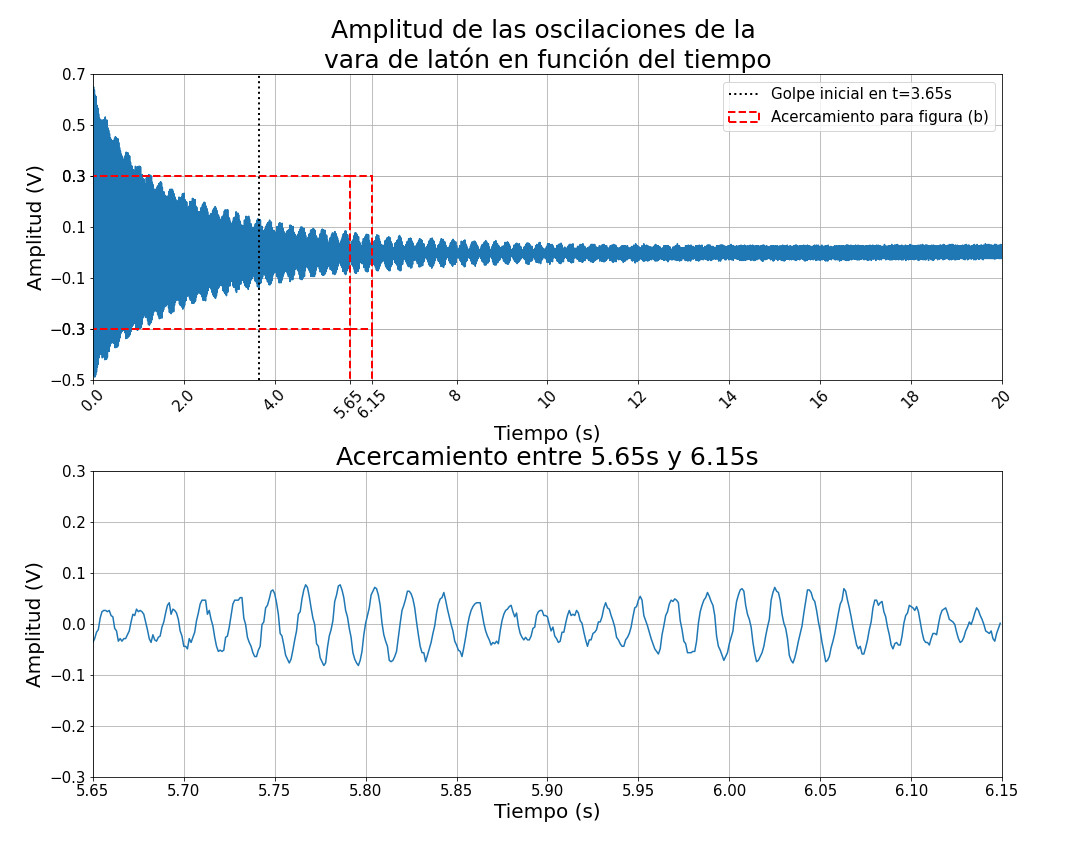

In [35]:
#importo las omwgas teoricas
w_l = []
w_a = [] 
for i in bl:#ver si bl es igual para ambos o no
    w_l.append((np.sqrt(E_l*Izz_l/B_l)*(i/L_l)**2).to(1/un.second))
    w_a.append((np.sqrt(E_a*Izz_a/B_a)*(i/L_a)**2).to(1/un.second))
    
print(w_a)
#primero grafico los datos del acero
%matplotlib nbagg
data = np.array(archivos_acero[0])


t_in=3650
t_fin=25000
data = data[t_in:t_fin,:]
data[:,1] = data[:,1] - np.mean(data[:,1]) #le saco la componente constante a la señal
data[:,0] = data[:,0] - data[0, 0] #le resto el tiempo donde recoté


import matplotlib.patches as patches
%matplotlib nbagg

fig, ax = plt.subplots(2, figsize=(15,12))
fig.tight_layout(pad=7)
rect = patches.Rectangle((2+3.65, -0.3), 0.5, 0.6, fill=False, edgecolor="red", linestyle="dashed", 
                         linewidth=2, zorder=10, label="Acercamiento para figura (b)")
ax[0].add_patch(rect)
ax[0].plot(data[:20000,0], data[:20000,1])
ax[0].set_ylabel("Amplitud (V)", fontsize=20)
ax[0].set_xlabel("Tiempo (s)", fontsize=20)
ax[0].set_title("Amplitud de las oscilaciones de la \nvara de latón en función del tiempo", fontsize=25)
ax[0].tick_params(labelsize=15)
xticks_0 = [0.00, 2.00,2+3.65, 2.5+3.65, 4.00, 8, 10, 12, 14, 16, 18, 20]
ax[0].set_xticks(xticks_0)
ax[0].set_xticklabels(xticks_0, rotation=45)
ax[0].set_yticks(np.append(np.arange(-0.5, 0.8, 0.2), [-0.3, 0.3]))
ax[0].set_ylim([-0.5, 0.7])
ax[0].set_xlim([0,20])
ax[0].plot([2+3.65, 2+3.65], [-0.3, -0.6], linestyle="dashed", color="r", linewidth=2)
ax[0].plot([2.5+3.65, 2.5+3.65], [-0.3, -0.6], linestyle="dashed", color="r", linewidth=2)
ax[0].plot([-1, 2+3.65], [-0.3, -0.3], linestyle="dashed", color="r", linewidth=2)
ax[0].plot([-1, 2+3.65], [0.3, 0.3], linestyle="dashed", color="r", linewidth=2)
ax[0].plot([3.65,3.65], [-0.5, 0.7], linestyle="dotted", color="k", linewidth=2, label="Golpe inicial en t=3.65s")
ax[0].legend(fontsize=15)


ax[0].grid()

ax[1].plot(data[2000+3650:2500+3650,0], data[2000+3650:2500+3650,1])
ax[1].set_ylabel("Amplitud (V)", fontsize=20)
ax[1].set_xlabel("Tiempo (s)", fontsize=20)
ax[1].set_title("Acercamiento entre 5.65s y 6.15s", fontsize=25)
xticks_1 = np.arange(2+3.65,2.51+3.65,0.05)
ax[1].set_xticks(xticks_1)
ax[1].set_yticks(np.arange(-0.3,0.4,0.1))
ax[1].set_xlim([2+3.65,2.5+3.65])
ax[1].tick_params(labelsize=15)
ax[1].grid()
plt.show()

<IPython.core.display.Javascript object>


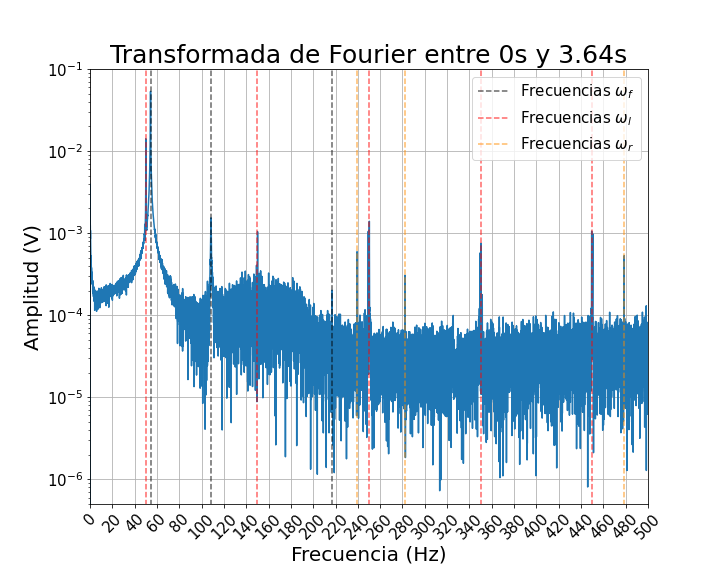

In [36]:
#filtro fourier
%matplotlib  nbagg


t_data = data[:,0]
v_data = data[:,1]

N = len(t_data)
t_max = t_data[-1]

fsamp = N/t_max

v_fft = np.fft.fft(v_data)
v_fft_2 = 2/N * np.abs(v_fft[:N//2])

frecuencia = np.linspace(0, fsamp/2, int(N/2))

fig, ax = plt.subplots(1, figsize=(10,8))
ax.semilogy(frecuencia, np.abs(v_fft_2))
ax.set_xlim([0,500])
ax.set_ylim([5e-7, 1e-1])
ax.grid()
ax.set_xticks(np.arange(0,520,20))
ax.set_xticklabels(np.arange(0, 520, 20), rotation=45)
ax.tick_params(labelsize=15)
ax.set_title("Transformada de Fourier entre 0s y 3.64s", fontsize=25)
ax.set_ylabel("Amplitud (V)", fontsize=20)
ax.set_xlabel("Frecuencia (Hz)", fontsize=20)

#Frecuencias fundamental y multiplos
ax.plot([54.26,54.26],[1e-7,1e-1], linestyle="dashed", color="k", alpha=0.6, label="Frecuencias $\omega_{f}$")
ax.plot([108.49,108.49], [1e-7, 1e-1], linestyle="dashed", color="k", alpha=0.6)
ax.plot([216.92,216.92], [1e-7, 1e-1], linestyle="dashed", color="k", alpha=0.6)

#Frecuencias de línea y múltiplos
ax.plot([50,50],[1e-7, 1e-1], linestyle="dashed", color="r", alpha=0.6, label="Frecuencias $\omega_l$")
ax.plot([150,150],[1e-7, 1e-1], linestyle="dashed", color="r", alpha=0.6)
ax.plot([250,250],[1e-7, 1e-1], linestyle="dashed", color="r", alpha=0.6)
ax.plot([350,350],[1e-7, 1e-1], linestyle="dashed", color="r", alpha=0.6)
ax.plot([450,450],[1e-7, 1e-1], linestyle="dashed", color="r", alpha=0.6)

#Frecuencias de ruido
ax.plot([239.28,239.28],[1e-7, 1e-1], linestyle="dashed", color="darkorange", alpha=0.6, label="Frecuencias $\omega_r$")
ax.plot([282.24,282.24],[1e-7, 1e-1], linestyle="dashed", color="darkorange", alpha=0.6)
ax.plot([478.61,478.61],[1e-7, 1e-1], linestyle="dashed", color="darkorange", alpha=0.6)
        
ax.legend(fontsize=15)
plt.show()
#print((frecuencia[-1] - frecuencia[0])/len(frecuencia))
#print(fsamp/N)

<IPython.core.display.Javascript object>


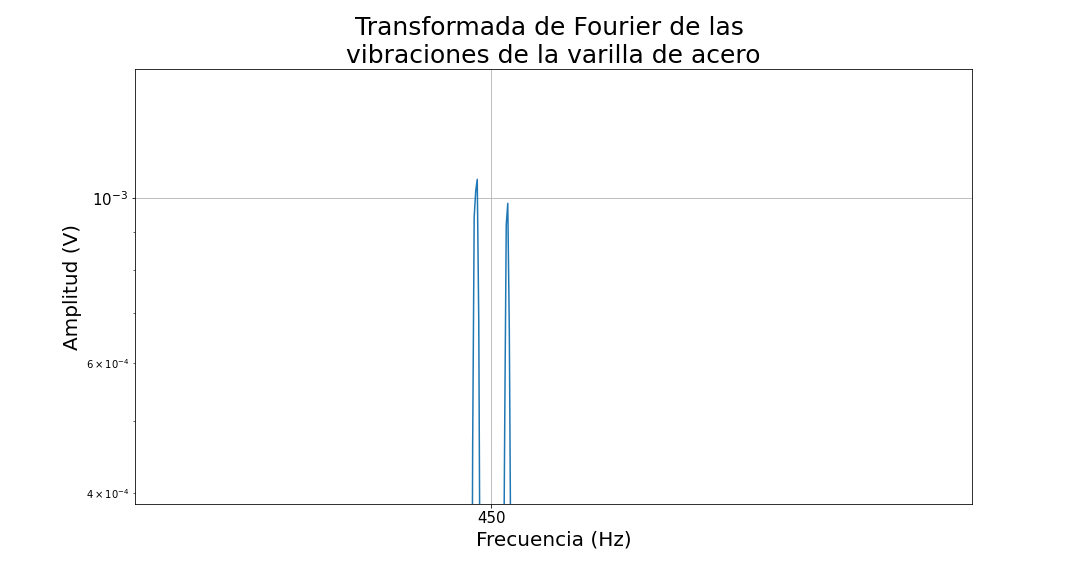

In [37]:
%matplotlib nbagg

fig, ax = plt.subplots(1, figsize=(15,8))
ax.semilogy(frecuencia, np.abs(v_fft_2))
ax.set_xlim([40,60])
ax.set_ylim([5e-7, 1e-1])
ax.grid()
ax.set_xticks(np.arange(0,520,50))
ax.set_title("Transformada de Fourier de las \nvibraciones de la varilla de acero", fontsize=25)
ax.set_ylabel("Amplitud (V)", fontsize=20)
ax.set_xlabel("Frecuencia (Hz)", fontsize=20)
ax.tick_params(labelsize=15)
plt.show()

<IPython.core.display.Javascript object>


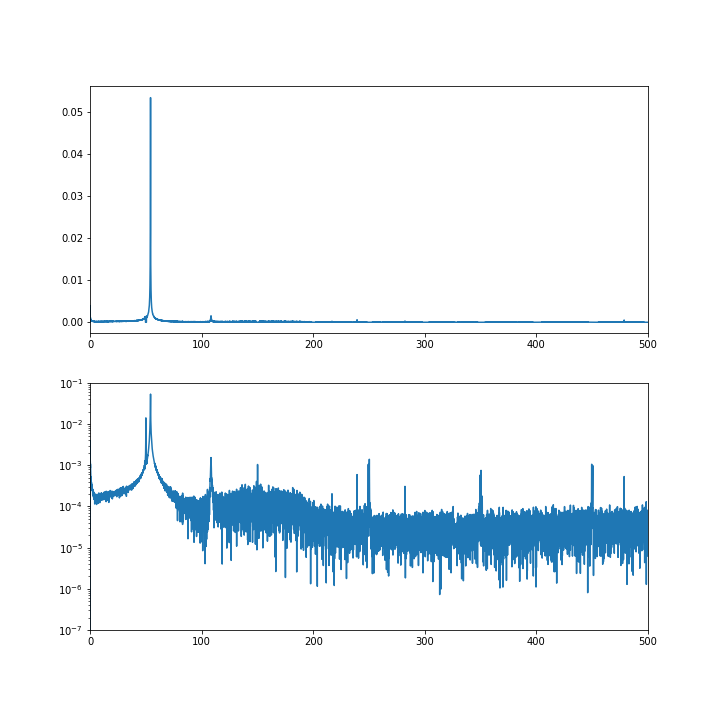

(array([1158]),)
[54.2464981]


In [16]:
%matplotlib nbagg

v_fft_filtrado = np.copy(v_fft)
v_fft_2_filtrado = np.copy(v_fft_2)
for n in range(10):
    v_fft_filtrado[1060*(n+1) : 1080*(n+1) ] = 0
    v_fft_2_filtrado[1060*(n+1) : 1080*(n+1)] = 0

fig, ax = plt.subplots(2, figsize=(10,10))
ax[0].plot(frecuencia, np.abs(v_fft_2_filtrado))
ax[1].semilogy(frecuencia, np.abs(v_fft_2))
ax[0].set_xlim([0,500])
ax[1].set_ylim([1e-7, 1e-1])
ax[1].set_xlim([0,500])
plt.show()
print(np.where(np.abs(v_fft_2) == np.abs(v_fft_2).max()))
print(frecuencia[np.where(np.abs(v_fft_2) == np.abs(v_fft_2).max())])

<IPython.core.display.Javascript object>


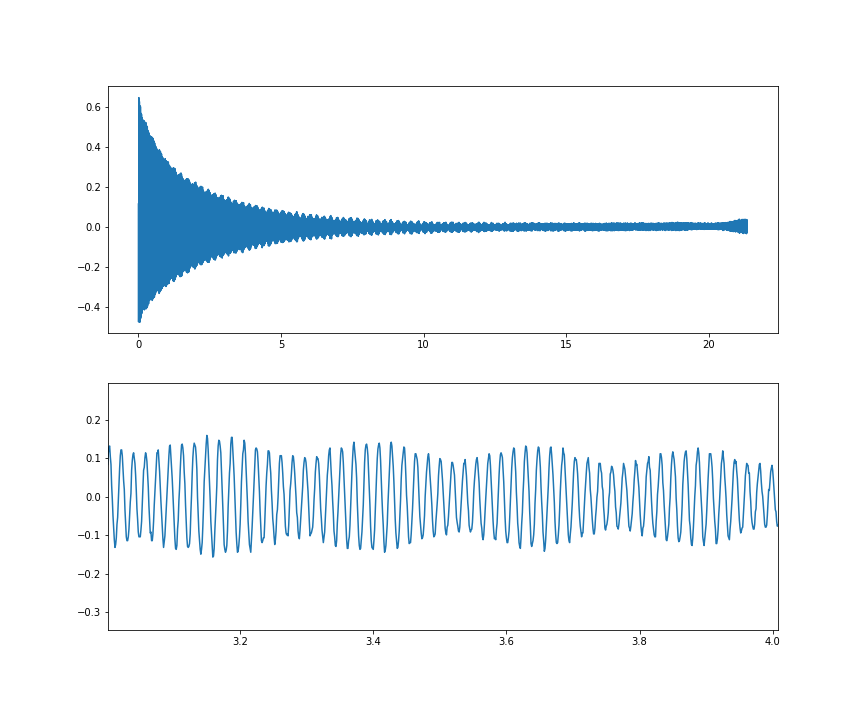

/home/dina/environments/labo_4/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [17]:
anti_transf_filt = np.fft.ifft(v_fft_filtrado)
anti_transf = np.fft.ifft(v_fft)

fig, ax = plt.subplots(2, figsize=(12,10))
ax[0].plot(t_data, anti_transf_filt)
ax[1].plot(t_data, v_data)
plt.show()

In [19]:

def v(t, A, w, fi, seda):
    v = np.zeros(t.size)
    for i in range(len(A)):
        v = v + A[i] * np.sin(w[i] * t + fi[i]) * np.exp(-seda * w[i] * t)
    #amp_luz = 0.028 * un.volts
    modos_luz = 3
    amp_luz = [0.02, 0, 0] * un.volts
    for i in range(modos_luz):
        w_luz = (2*i + 1) * 50 / un.second
        v = v + amp_luz[i] * np.sin(2*np.pi * w_luz * t)
    noise = np.random.normal(0, 1, int(1/tstep))
    v = v + 0.005 * noise * un.volt
    return v

tstep = 0.00001
t = np.linspace(0, 20, int(1/tstep)) * un.second
fi = [0.1 + np.pi,0,0,0] * un.radian
A = np.array([0.3,0.1]) * un.volts

w = w_a
w_exp = np.array([54.2464981, 282.23]) * un.hertz
w = w_exp
print(w)
seda = 0.001

w = np.array(w, dtype=object) * (1 - seda * np.ones(len(w)))
w = w * un.hertz
print(w)
print(w/ (2*np.pi))
print(t)
v_sim = v(t, A, w*2*np.pi, fi, seda)



[54.2464981 282.23] hertz
[54.1922516019 281.94777] hertz
[8.624964719722069 44.8733812892368] hertz
[0.0 0.0002000040000800016 0.0004000080001600032 ... 19.99959999199984 19.99979999599992 20.0] second


<ipython-input-19-65e2317fad25>:26: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  w = np.array(w, dtype=object) * (1 - seda * np.ones(len(w)))


<ipython-input-20-b98ba29cf54e>:2: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  v_fft_teorico = np.fft.fft(np.array(v_sim))
/home/dina/environments/labo_4/lib/python3.8/site-packages/numpy/core/_asarray.py:102: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)


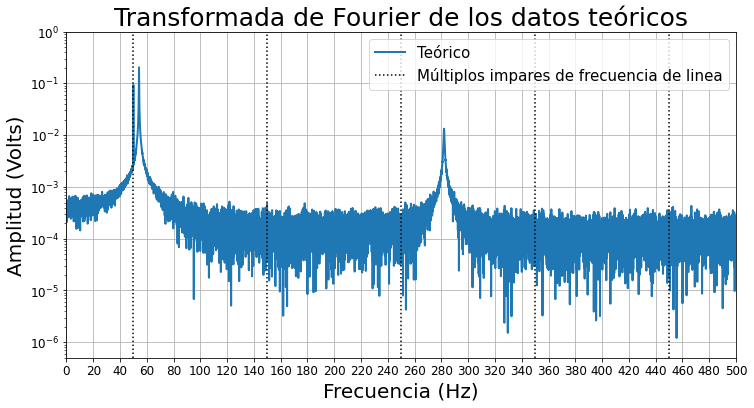

In [20]:
%matplotlib inline
v_fft_teorico = np.fft.fft(np.array(v_sim))
v_fft_2_teorico = 2/N * np.abs(v_fft_teorico[:N//2])

fsamp = N/t[-1]
frecuencia_sim = np.linspace(0, fsamp/2, int(N/2))

fig, ax = plt.subplots(1, figsize=(12,6))
ax.semilogy(frecuencia_sim, np.abs(v_fft_2_teorico), linewidth=2, label="Teórico")
ax.set_xlim([0,500])
ax.set_ylim([5e-7, 1e0])
ax.set_title("Transformada de Fourier de los datos teóricos", fontsize=25)
ax.set_xlabel("Frecuencia (Hz)", fontsize=20)
ax.set_ylabel("Amplitud (Volts)", fontsize=20)
ax.grid()
ax.set_xticks(np.arange(0,520,20))
ax.tick_params(labelsize=12, rotation=0)
ax.axvline(50, linestyle="dotted", color="black", label="Múltiplos impares de frecuencia de linea")
ax.axvline(150, linestyle="dotted", color="black")
ax.axvline(250, linestyle="dotted", color="black")
ax.axvline(350, linestyle="dotted", color="black")
ax.axvline(450, linestyle="dotted", color="black")

plt.legend(fontsize=15)
plt.show()



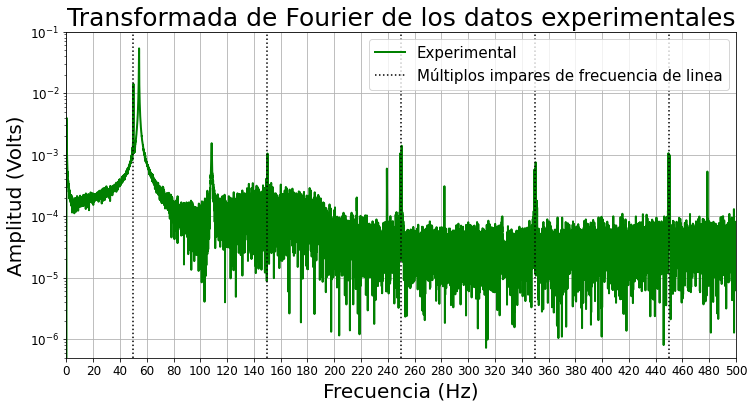

In [21]:

fig, ax = plt.subplots(1, figsize=(12,6))
ax.semilogy(frecuencia, np.abs(v_fft_2), linewidth=2, label="Experimental", color="green")
ax.set_xlim([0,500])
ax.set_ylim([5e-7, 1e-1])
ax.set_title("Transformada de Fourier de los datos experimentales", fontsize=25)
ax.set_xlabel("Frecuencia (Hz)", fontsize=20)
ax.set_ylabel("Amplitud (Volts)", fontsize=20)
ax.grid()
ax.set_xticks(np.arange(0,520,20))
ax.tick_params(labelsize=12, rotation=0)
ax.axvline(50, linestyle="dotted", color="black", label="Múltiplos impares de frecuencia de linea")
ax.axvline(150, linestyle="dotted", color="black")
ax.axvline(250, linestyle="dotted", color="black")
ax.axvline(350, linestyle="dotted", color="black")
ax.axvline(450, linestyle="dotted", color="black")
plt.legend(fontsize=15)
plt.show()


<IPython.core.display.Javascript object>


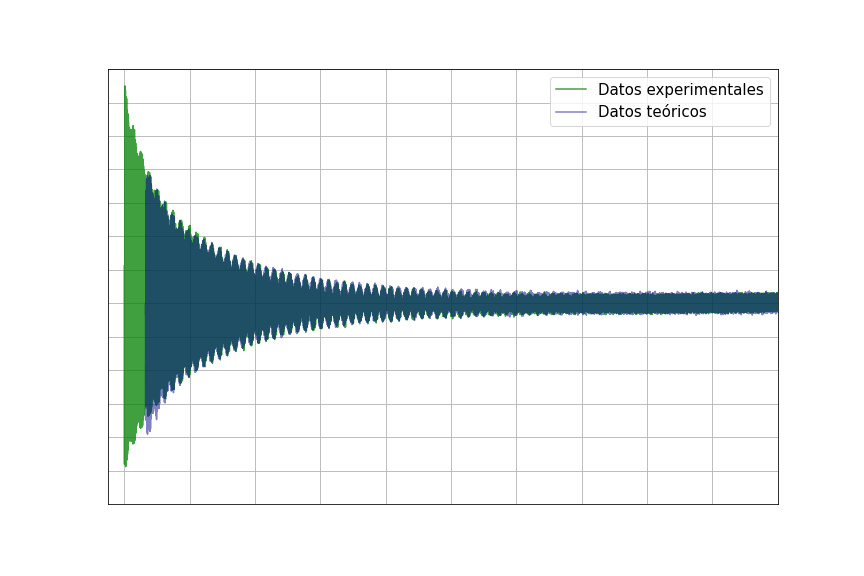

<ipython-input-22-918ecf8acd06>:4: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  t_graf = np.array(t)
<ipython-input-22-918ecf8acd06>:5: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  v_graf = np.array(v_sim) #+ offset
/home/dina/environments/labo_4/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [22]:
%matplotlib nbagg
fig, ax = plt.subplots(1, figsize=(12,8))

t_graf = np.array(t)
v_graf = np.array(v_sim) #+ offset

#ax.plot(t_data, anti_transf_filt, color='red')
ax.plot(t_data, anti_transf, color="green", alpha=0.75, label="Datos experimentales")
ax.plot(t_graf + 0.65, v_graf, color="darkblue", alpha=0.5, label="Datos teóricos")
ax.set_xlabel("Tiempo (s)", fontsize=20, color="w")
ax.set_ylabel("Amplitud (V)", fontsize=20, color="w")
ax.grid()
ax.set_title("Diferencia de potencial en función del tiempo\n para la vara de acero", fontsize=25, color="w")
ax.set_xlim([-0.5,20])
ax.set_xticks(np.arange(0,22,2))
ax.set_yticks(np.arange(-0.7, 0.8, 0.1))
ax.set_ylim([-0.6, 0.7])
ax.tick_params(colors="w")
plt.legend(fontsize=15)
plt.show()


In [144]:
for w in w_a:
    print(w/(2*np.pi))
    
print(340/(2*np.pi))
print(Izz_a)

49.03752450962432 / second
307.3129254618689 / second
860.4850426047991 / second
1686.2072149739017 / second
54.11268065124442
12.566370614359172 millimeter ** 4


In [43]:
A_prueba = np.pi * (d_a/2)**2
E_res = 245e9 * un.pascal
rho_accc = 7850 * un.kilogram / un.meter**3
print(bl[1], L_a, E_res, Izz_a, rho_accc, A_prueba)

4.694091 240 millimeter 245000000000.0 pascal 12.566370614359172 millimeter ** 4 7850.0 kilogram / meter ** 3 12.566370614359172 millimeter ** 2


In [47]:
w_2_prueba = (bl[1]/L_a)**2 * np.sqrt((E_res * Izz_a) / (rho_accc * A_prueba))
print(w_2_prueba.to(un.hertz)/(2*np.pi))

340.13307960417035 hertz


Calculo el error de la estimación de $\omega$

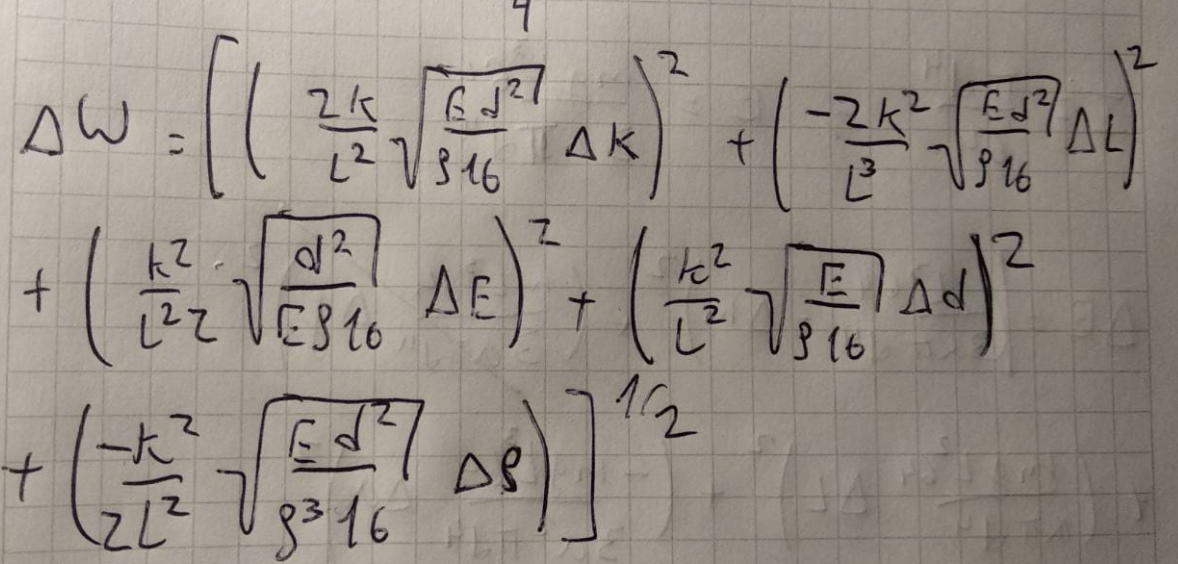

Calculo el error de E

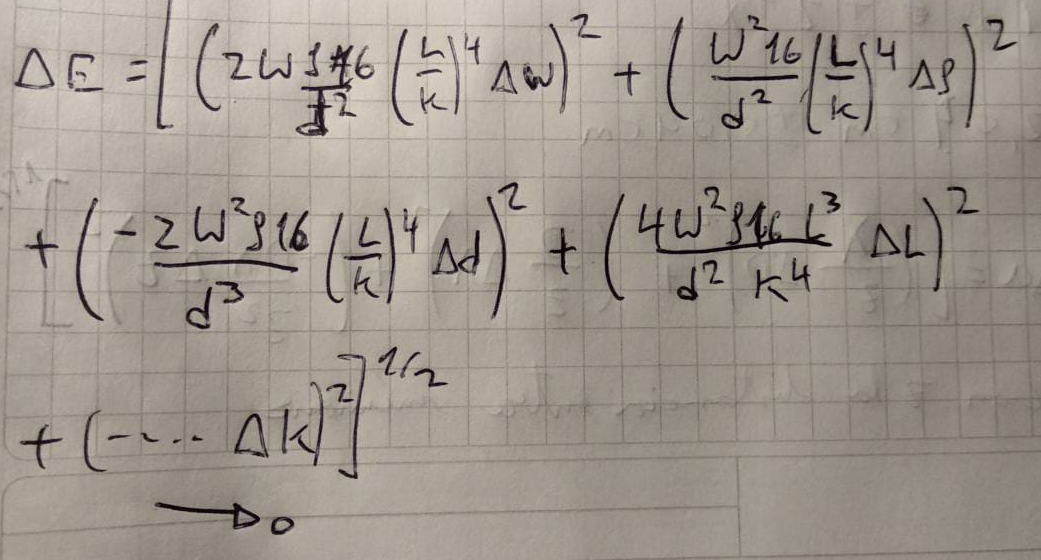

In [39]:
w = 2*np.pi*54.23 * un.hertz
d = 4 * un.millimeter
L = 240 * un.millimeter
k = bl[0]
er_d = 0.2 * un.millimeter
rho = 7850 * un.kg / un.meter**3

print(w, d, L, k, er_d, rho)

340.73713920834894 hertz 4 millimeter 240 millimeter 1.875104 0.2 millimeter 7850.0 kilogram / meter ** 3


In [42]:
tercero = (2 * w**2 * rho * 16 * L**4 * er_d) / (d**3 * k**4)
print(tercero.to(un.gigapascal))

24.459756435919665 gigapascal
